## Large Scale Final Project
Do Amazon voting behaviors reveal social conformity?
Chun Hu

### Category 1: Books

In [0]:
data = spark.read.parquet('s3://amazon-reviews-pds/parquet/product_category=Books/*.parquet')

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1591214933999_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
print('Total Columns: %d' % len(data.dtypes))
print('Total Rows: %d' % data.count())
data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 15
Total Rows: 20726160
root
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- year: integer (nullable = true)

In [0]:
data.groupby('marketplace').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+--------+
|marketplace|   count|
+-----------+--------+
|         DE|   63860|
|         US|20370130|
|         UK|  258057|
|         FR|   21462|
|         JP|   12651|
+-----------+--------+

Since I'll look at how conformity varies across different marketplaces, I check to see if all marketplaces have eenough data to do the analysis.

In [0]:
data[['product_id', 'total_votes', 'helpful_votes', 'star_rating']].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------+-------------+-----------+
|product_id|total_votes|helpful_votes|star_rating|
+----------+-----------+-------------+-----------+
|1848192576|         10|            9|          5|
|145162445X|          7|            4|          4|
|055341805X|          0|            0|          4|
|0425263908|          1|            1|          5|
|1416556141|          0|            0|          5|
|1455523003|          7|            5|          4|
|0990388697|          1|            1|          4|
|0345803485|          7|            7|          1|
|1469245167|          0|            0|          4|
|0345803485|          9|            0|          5|
|0743477111|          0|            0|          4|
|1609611543|          1|            1|          5|
|0563551933|          0|            0|          5|
|0061777269|          0|            0|          5|
|0316769487|          6|            1|          1|
|0307730697|          0|            0|          4|
|0448439158|          0|       

In [0]:
data = data.withColumn('helpful_ratio', (data.helpful_votes / data.total_votes).cast("float"))
data = data.filter('helpful_ratio IS NOT NULL')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_rating = data.groupBy('product_id').avg('star_rating')
avg_rating.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------------+
|product_id| avg(star_rating)|
+----------+-----------------+
|0070682895|3.857142857142857|
|0830745637|4.066666666666666|
|0738719749|              4.2|
|1580400647|4.444444444444445|
|1600610234|4.611111111111111|
|0962052728|4.417808219178082|
|0061129704|              4.0|
|141698982X|              4.0|
|1401217850|2.923076923076923|
|0520250540|4.382352941176471|
|141855068X|             3.75|
|0812975995|              4.0|
|1843108860|              4.5|
|0486284247|4.611111111111111|
|1884527388|             4.55|
|1469943042|4.935483870967742|
|0827235216|           4.9375|
|0446608467|3.090909090909091|
|0553159585|              4.5|
|0205482252|              5.0|
+----------+-----------------+
only showing top 20 rows

Merge the average rating of the product with the original dataset

In [0]:
data_books = data.join(avg_rating, on=['product_id'], how='left_outer')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_books[['product_id', 'star_rating', 'helpful_ratio', 'avg(star_rating)']].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------+-------------+----------------+
|product_id|star_rating|helpful_ratio|avg(star_rating)|
+----------+-----------+-------------+----------------+
|0001052020|          5|    0.6666667|             5.0|
|0001055941|          5|          1.0|             5.0|
|0001055941|          5|         0.75|             5.0|
|0001056336|          5|          1.0|             5.0|
|0001380753|          5|          1.0|             5.0|
|0001543849|          5|          1.0|             5.0|
|0001713345|          5|          0.9|             5.0|
|0001720104|          2|          1.0|             2.0|
|0001850164|          5|          0.0|            3.75|
|0001850164|          1|          0.0|            3.75|
|0001850164|          4|          0.0|            3.75|
|0001850164|          5|    0.6666667|            3.75|
|0001942123|          5|          1.0|             5.0|
|0001956752|          5|          0.0|             5.0|
|0002117207|          4|          1.0|          

In [0]:
data_books = data_books.withColumn('avg_rating', data_books["avg(star_rating)"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Descriptive Statistics of products in BOOKS category:

In [0]:
data_books[['avg_rating']].summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|        avg_rating|
+-------+------------------+
|  count|          13125056|
|   mean| 4.184285308954664|
| stddev|0.7053769707886338|
|    min|               1.0|
|    25%| 3.857142857142857|
|    50%|  4.31858407079646|
|    75%|            4.6875|
|    max|               5.0|
+-------+------------------+

In [0]:
data_books[['helpful_votes']].summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+
|summary|    helpful_votes|
+-------+-----------------+
|  count|         13125056|
|   mean| 6.05828950367907|
| stddev|27.91947303378633|
|    min|                0|
|    25%|                1|
|    50%|                2|
|    75%|                5|
|    max|            27550|
+-------+-----------------+

Huge variance in the number of helpful votes

In [0]:
from pyspark.sql.functions import abs

data_books = data_books.withColumn('rating_diff', abs(data_books.avg_rating - data_books.star_rating).cast("float"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_books[['product_id', 'helpful_ratio', 'rating_diff']].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------+-----------+
|product_id|helpful_ratio|rating_diff|
+----------+-------------+-----------+
|0001052020|    0.6666667|        0.0|
|0001055941|          1.0|        0.0|
|0001055941|         0.75|        0.0|
|0001056336|          1.0|        0.0|
|0001380753|          1.0|        0.0|
|0001543849|          1.0|        0.0|
|0001713345|          0.9|        0.0|
|0001720104|          1.0|        0.0|
|0001850164|          0.0|       1.25|
|0001850164|    0.6666667|       1.25|
|0001850164|          0.0|       2.75|
|0001850164|          0.0|       0.25|
|0001942123|          1.0|        0.0|
|0001956752|          0.0|        0.0|
|0002117207|          1.0|        0.0|
|0002117371|          1.0|        0.0|
|0002151731|          0.4|        0.0|
|000217006X|    0.8333333|        0.0|
|0002202085|          1.0|        0.0|
|0002211297|    0.9230769|        0.0|
+----------+-------------+-----------+
only showing top 20 rows

In [0]:
sc.install_pypi_package("seaborn")
sc.install_pypi_package("pandas")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/c7/e6/54aaaafd0b87f51dfba92ba73da94151aa3bc179e5fe88fc5dfb3038e860/seaborn-0.10.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a4/5f/1b6e0efab4bfb738478919d40b0e3e1a06e3d9996da45eb62a77e9a090d9/pandas-1.0.4-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dd/82/c1fe128f3526b128cfd185580ba40d01371c5d299fcf7f77968e22dfcc2e/scipy-1.4.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

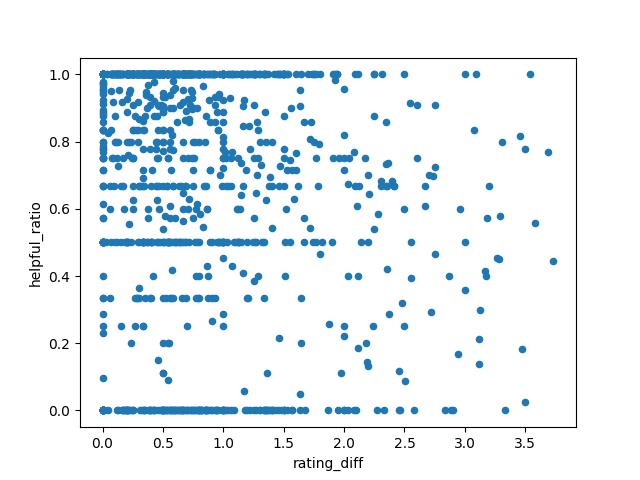

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sampled_df = data_books.sample(fraction=0.0001).toPandas()
sampled_df.plot.scatter('rating_diff', 'helpful_ratio')
%matplot plt

The scatterplot shows that there are a lot more reviews at smaller rating differences and higher helpfulness ratios. There are also more reviews at helpful_ratio equals 0.0, 0.5, and 1.0.

In [0]:
from pyspark.ml.feature import Bucketizer

bucketizer = Bucketizer(splits=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                        inputCol="helpful_ratio", outputCol="ratio_buckets")
books_buck = bucketizer.setHandleInvalid("keep").transform(data_books)

books_buck[['rating_diff', 'ratio_buckets']].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------------+
|rating_diff|ratio_buckets|
+-----------+-------------+
|        0.0|          6.0|
|        0.0|          9.0|
|        0.0|          7.0|
|        0.0|          9.0|
|        0.0|          9.0|
|        0.0|          9.0|
|        0.0|          8.0|
|        0.0|          9.0|
|       2.75|          0.0|
|       1.25|          0.0|
|       1.25|          6.0|
|       0.25|          0.0|
|        0.0|          9.0|
|        0.0|          0.0|
|        0.0|          9.0|
|        0.0|          9.0|
|        0.0|          4.0|
|        0.0|          8.0|
|        0.0|          9.0|
|        0.0|          9.0|
+-----------+-------------+
only showing top 20 rows

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

t = {0.0:"0.1", 1.0:"0.2", 2.0:"0.3", 3.0:"0.4", 4.0:"0.5", 5.0:"0.6", 6.0:"0.7", 7.0:"0.8", 8.0:"0.9", 9.0:"1.0"}
udf_foo = udf(lambda x: t[x], StringType())
books_buck = books_buck.withColumn("helpfulness_ratio", udf_foo("ratio_buckets"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_df = (books_buck.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_df = avg_df.filter(avg_df.helpfulness_ratio != '0.1')
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-------------------+
|helpfulness_ratio|   avg(rating_diff)|
+-----------------+-------------------+
|              1.0|0.48958752010430856|
|              0.9| 0.7929383574821978|
|              0.8| 0.9319286147526906|
|              0.7| 0.9360200359371887|
|              0.6| 0.8907560142103281|
|              0.5|  1.468675451229419|
|              0.4|  1.236570086364539|
|              0.3| 1.4627770867307803|
|              0.2| 1.7650566921857476|
+-----------------+-------------------+

Removed the bucket at helpfulness_ratio equals 0.0-0.1 (most reviews have helpful_ratio = 0) because it could be that there are no votes at all. Then it's not fair to compare their helpfulness ratios with others.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

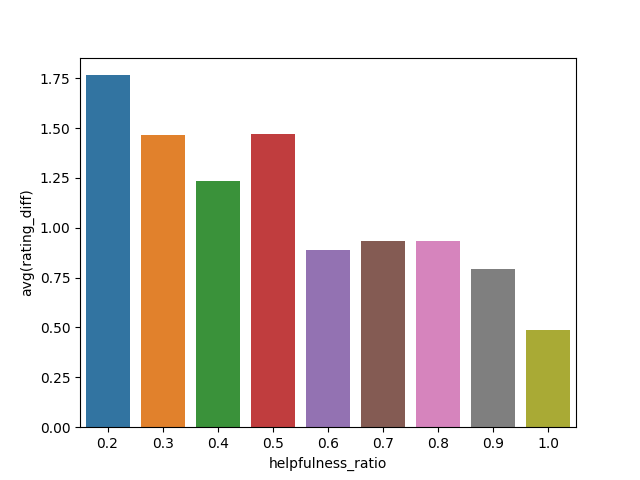

In [0]:
plt.close()

sns.barplot(x='helpfulness_ratio', y='avg(rating_diff)', data=avg_df.toPandas())
%matplot plt

The barplot shows that as helpfulness ratio increases, the difference between review rating and average product rating decreases. This confirms our hypothesis that there is social conformity in voting behaviors.

### By Marketplace
Do different marketplaces (or countries) have different trends?

In [0]:
books_buck.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- product_id: string (nullable = true)
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- year: integer (nullable = true)
 |-- helpful_ratio: float (nullable = true)
 |-- avg(star_rating): double (nullable = true)
 |-- avg_rating: double (nullable = true)
 |-- rating_diff: float (nullable = true)
 |-- ratio_buckets: double (nullable = true)
 |-- helpfulness_ratio: string (nullable = true)

In [0]:
us_books = books_buck.filter(books_buck.marketplace == 'US')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_us = (us_books.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_df = avg_us.filter(avg_us.helpfulness_ratio != '0.1')
avg_df = avg_df.withColumn('diff', avg_df["avg(rating_diff)"])
avg_df = avg_df.selectExpr("helpfulness_ratio as helpfulness_ratio", "diff as US")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+
|helpfulness_ratio|                US|
+-----------------+------------------+
|              1.0|0.4879387853817715|
|              0.9|0.7912753560190235|
|              0.8|0.9299041866853917|
|              0.7|0.9340661388725395|
|              0.6|0.8886427887705495|
|              0.5|  1.46779673568354|
|              0.4|1.2352284864831617|
|              0.3|1.4615507045532654|
|              0.2|1.7629473807204035|
+-----------------+------------------+

In [0]:
uk_books = books_buck.filter(books_buck.marketplace == 'UK')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_uk = (uk_books.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_uk = avg_uk.filter(avg_uk.helpfulness_ratio != '0.1')
avg_uk = avg_uk.withColumn('diff', avg_uk["avg(rating_diff)"])
avg_df = avg_df.join(avg_uk, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "diff as UK")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-------------------+------------------+
|helpfulness_ratio|                 US|                UK|
+-----------------+-------------------+------------------+
|              1.0|0.48793878538177143|0.6851653325435065|
|              0.9| 0.7912753560190235|0.9441190523958412|
|              0.8| 0.9299041866853917|1.1102395636941267|
|              0.7| 0.9340661388725395|1.0908690618930899|
|              0.6| 0.8886427887705495|1.0369055553516175|
|              0.5|   1.46779673568354|1.6416548539467954|
|              0.4| 1.2352284864831617|1.3945037253062742|
|              0.3| 1.4615507045532654|1.6255461764314838|
|              0.2| 1.7629473807204035|1.9827381953266092|
+-----------------+-------------------+------------------+

In [0]:
de_books = books_buck.filter(books_buck.marketplace == 'DE')

avg_de = (de_books.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_de = avg_de.filter(avg_de.helpfulness_ratio != '0.1')
avg_de = avg_de.withColumn('diff', avg_de["avg(rating_diff)"])
avg_df = avg_df.join(avg_de, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "diff as DE")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+------------------+------------------+
|helpfulness_ratio|                US|                UK|                DE|
+-----------------+------------------+------------------+------------------+
|              1.0|0.4879387853817715|0.6851653325435065|0.7047571563003384|
|              0.9|0.7912753560190235|0.9441190523958412|0.8096562235032314|
|              0.8|0.9299041866853917|1.1102395636941267| 0.961838329712227|
|              0.7|0.9340661388725395|1.0908690618930899|0.9704525719142013|
|              0.6|0.8886427887705495|1.0369055553516175|1.0054698063755259|
|              0.5|  1.46779673568354|1.6416548539467954| 1.362662462713082|
|              0.4|1.2352284864831617|1.3945037253062742|1.2204834951171235|
|              0.3|1.4615507045532654|1.6255461764314838|1.5093589798961136|
|              0.2|1.7629473807204035|1.9827381953266092|1.9338078815756607|
+-----------------+------------------+------------------+------------------+

In [0]:
fr_books = books_buck.filter(books_buck.marketplace == 'FR')

avg_fr = (fr_books.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_fr = avg_fr.filter(avg_fr.helpfulness_ratio != '0.1')
avg_fr = avg_fr.withColumn('diff', avg_fr["avg(rating_diff)"])
avg_df = avg_df.join(avg_fr, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "DE", "diff as FR")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
jp_books = books_buck.filter(books_buck.marketplace == 'JP')

avg_jp = (jp_books.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_jp = avg_jp.filter(avg_jp.helpfulness_ratio != '0.1')
avg_jp = avg_jp.withColumn('diff', avg_jp["avg(rating_diff)"])
avg_df = avg_df.join(avg_jp, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "DE", "FR", "diff as JP")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

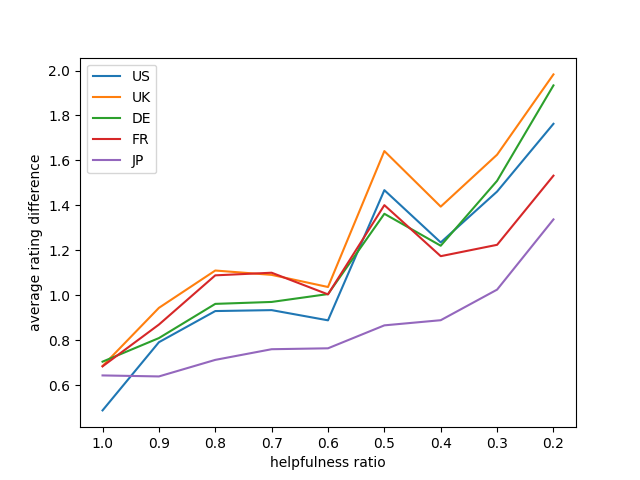

In [0]:
# plot for all countries
plt.close()

US, = plt.plot('helpfulness_ratio', 'US', data=avg_df.toPandas(), label="US")
UK, = plt.plot('helpfulness_ratio', 'UK', data=avg_df.toPandas(), label="UK")
DE, = plt.plot('helpfulness_ratio', 'DE', data=avg_df.toPandas(), label="DE")
FR, = plt.plot('helpfulness_ratio', 'FR', data=avg_df.toPandas(), label="FR")
JP, = plt.plot('helpfulness_ratio', 'JP', data=avg_df.toPandas(), label="JP")
plt.legend(handles=[US, UK, DE, FR, JP])
plt.xlabel('helpfulness ratio')
plt.ylabel('average rating difference')
%matplot plt

The lineplot shows that voting behaviors in all marketplaces reveal trends for social conformity. Previous research suggests that collectivist countries show higher conformity than individualist countries. Here, we see that for reviews in Japan (collectivitst), the increase in average rating difference is more gentle compared to that in other marketplaces (individualist). This suggests that in Japan, even unhelpful reviews have ratings pretty close to the consensus rating of the product (when helpfulness ratio = 0.2, the average rating difference = 1.3). This is a potential evidence that collectivist countries tend to show higher conformity. However, we need more data and analysis to validate our results. Especially because US reviews make up a large proportion of the data in Amazon reviews, and so we get fewer data for other countries.

### Sentiment Analysis
What are some characteristics of reviews that have high or low helpfulness ratio?

In [1]:
import os

# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

# Install pyspark
! pip install --ignore-installed pyspark==2.4.4

# Install Spark NLP
! pip install --ignore-installed spark-nlp==2.5.1

# Quick SparkSession start
import sparknlp
spark = sparknlp.start()

print("Spark NLP version")
sparknlp.version()
print("Apache Spark version")
spark.version

openjdk version "1.8.0_252"
OpenJDK Runtime Environment (build 1.8.0_252-8u252-b09-1~18.04-b09)
OpenJDK 64-Bit Server VM (build 25.252-b09, mixed mode)
     |████████████████████████████████| 215.7MB 56kB/s 
     |████████████████████████████████| 204kB 44.5MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130388 sha256=6305ef86388df826905adf9d7c384c58e85a9a4cbf1bad738a61299a7df2001e
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark
     |████████████████████████████████| 122kB 8.6MB/s 
Spark NLP version
Apache Spark version


'2.4.4'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import glob
import pandas as pd

file_path = glob.glob("/content/drive/My Drive/amazon-reviews-dataset/*")
file = file_path[-1]

with open(file) as tsvfile:
    col_names = ["marketplace", "customer_id", "review_id", "product_id", "product_parent", "product_title",
               "category", "star_rating", "helpful_votes", "total_votes", "vine", "verified_purchase", 
               "review_headline", "review_body", "review_date"]
    data = pd.read_csv(file, sep='\t', names=col_names, skiprows=10000000, low_memory=False)

Skip rows because Colab cannot handle huge datasets

In [6]:
data['helpful_ratio'] = data['helpful_votes'] / data['total_votes']
data = data[data['helpful_ratio'].notnull()]
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_ratio
1,US,52319226,RLR7QT2FF3VCL,0984035079,931476334,Black & White,Books,5,1,1,N,Y,This guy knows his stuff,"As a police psychologist, I can tell you Wes A...",2012-07-07,1.0000
5,US,27802423,R18RIAS322IUXQ,1567924522,187141499,"Ingenious Contrivances, Curiously Carved: Scri...",Books,3,0,4,N,Y,bad packaging,Verry fine book. But the corners of the book w...,2012-07-07,0.0000
6,US,49003190,R2I8IQSRPKF4IH,0786020288,426408694,Pulse (A Frank Quinn Novel),Books,3,15,16,N,N,Not His Best,I've been a fan of John Lutz for many years. T...,2012-07-07,0.9375
8,US,22302056,R1VRMQAV3ESWCX,1933339500,282116897,"Telling God's Story, Year Two: The Kingdom of ...",Books,5,9,9,N,Y,Best kids Bible resource I've seen...,Our family has used some great resources (The ...,2012-07-07,1.0000
9,US,15844946,R33KQLKXUB91FQ,082634254X,191660256,Antonio's Gun and Delfino's Dream: True Tales ...,Books,5,1,1,N,Y,"good condition, great book!","The book came in great condition, like new act...",2012-07-07,1.0000


In [19]:
most_helpful = data[data['helpful_ratio'] == 1.0]
most_helpful.shape

(81053, 16)

In [20]:
least_helpful = data[data['helpful_ratio'] <= 0.2]
least_helpful.shape

(20269, 16)

In [0]:
from sklearn.utils import shuffle
most_helpful = shuffle(most_helpful)[:10000]
least_helpful = shuffle(least_helpful)[:10000]

In [22]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline('analyze_sentiment', lang='en')
most_helpful['sentiment'] = most_helpful['review_body'].apply(pipeline.annotate)

analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]


In [0]:
most_helpful['bin'] = most_helpful.sentiment.apply(lambda x: x['sentiment'][0])
most_helpful['sentiment_value'] = most_helpful.bin.astype("category").cat.codes - 1

In [24]:
most_helpful['sentiment_value'].mean()

0.5874

In [0]:
least_helpful['sentiment'] = least_helpful['review_body'].apply(pipeline.annotate)

In [0]:
least_helpful['bin'] = least_helpful.sentiment.apply(lambda x: x['sentiment'][0])
least_helpful['sentiment_value'] = least_helpful.bin.astype("category").cat.codes - 1

In [27]:
least_helpful['sentiment_value'].mean()

0.5987

Helpful reviews and unhelpful reviews have similar sentiment values. This makes sense because helpful reviews do not necessarily show positive emotions and vice versa.

### TF-IDF
What are the top terms in helpful and unhelpful reviews?

In [0]:
most_helpful = data[data['helpful_ratio'] == 1.0]
least_helpful = data[data['helpful_ratio'] < 0.2]
most_helpful = shuffle(most_helpful)[:10000][['review_body']]
least_helpful = shuffle(least_helpful)[:10000][['review_body']]

In [0]:
from pyspark.sql import SparkSession
# start spark session
spark = SparkSession.builder.master('local[*]').getOrCreate()

spark_helpful = spark.createDataFrame(most_helpful)
spark_unhelpful = spark.createDataFrame(least_helpful)

In [0]:
from pyspark.ml.feature import *
from pyspark.ml import Pipeline

tokenizer = Tokenizer(inputCol="review_body", outputCol="words")
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
countVect = CountVectorizer(inputCol="filtered", outputCol="cv",  minDF=5.0)
idf = IDF(inputCol="cv", outputCol="idf")
pipeline = Pipeline(stages=[tokenizer, remover, countVect, idf])

Helpful Reviews

In [0]:
helpful = pipeline.fit(spark_helpful).transform(spark_helpful)

In [37]:
helpful.select("filtered", "idf").show()

+--------------------+--------------------+
|            filtered|                 idf|
+--------------------+--------------------+
|[loved, book,, mr...|(17618,[0,1,3,5,7...|
|[amazing, story, ...|(17618,[1,6,19,21...|
|[finished, book, ...|(17618,[1,2,3,4,5...|
|[nazim, rashid, a...|(17618,[0,1,4,17,...|
|[wow, -, word, us...|(17618,[0,1,2,10,...|
|[book, profiles, ...|(17618,[0,1,3,5,4...|
|[programmers, con...|(17618,[0,1,2,8,1...|
|[back, november, ...|(17618,[0,2,4,14,...|
|[detailed;, infor...|(17618,[2,12,54,9...|
|[zoltan, barbu,, ...|(17618,[0,2,5,8,9...|
|[original, much, ...|(17618,[0,1,2,4,1...|
|[read, beth, howa...|(17618,[0,4,6,7,8...|
|[review, original...|(17618,[0,4,5,6,1...|
|[usually, depend,...|(17618,[1,3,4,5,1...|
|[fantastic,, mind...|(17618,[48,71,75,...|
|[fantastic, book....|(17618,[0,17,25,4...|
|[bought, book, en...|(17618,[1,11,12,1...|
|[native, english,...|(17618,[1,2,3,6,7...|
|[purchased, book,...|(17618,[1,22,30,3...|
|[book, rife, clea...|(17618,[1,

In [0]:
helpful_df = helpful.select("filtered", "idf").toPandas()

In [0]:
words = []
for index, value in helpful_df['filtered'].iteritems():
    words += value

features = []
for index, value in helpful_df["idf"].iteritems():
    dict_val = value.values.tolist()
    features += dict_val

In [0]:
from operator import itemgetter
indices, list_sorted = zip(*sorted(enumerate(features), key=itemgetter(1)))

In [66]:
for i in indices[:10]:
    print(words[i])

talent
able
shared
fill
recognizing
class
reservations
acerbic.
edition.
history


Unhelpful Reviews

In [0]:
unhelpful = pipeline.fit(spark_unhelpful).transform(spark_unhelpful)

In [0]:
unhelpful_df = unhelpful.select("filtered", "idf").toPandas()

In [0]:
words = []
for index, value in unhelpful_df['filtered'].iteritems():
    words += value

features = []
for index, value in unhelpful_df["idf"].iteritems():
    dict_val = value.values.tolist()
    features += dict_val

In [0]:
from operator import itemgetter
indices, list_sorted = zip(*sorted(enumerate(features), key=itemgetter(1)))

In [74]:
for i in indices[:15]:
    print(words[i])


war.

/>.<br
moving
view
kinsey,
started
read
painful...and
horrors
audiobook,
/>1what
review.
believe
